In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import random


def generate_qubits_qiskit(n):
    """
    Simulates Alice generating qubits and encoding them in random bases using Qiskit.
    """
    bits = [random.randint(0, 1) for _ in range(n)]  # Random bits
    bases = [random.randint(0, 1) for _ in range(n)]  # Random bases (0: rectilinear, 1: diagonal)
    circuits = []

    for bit, basis in zip(bits, bases):
        qc = QuantumCircuit(1, 1)
        if bit == 1:
            qc.x(0)  # Apply X gate for bit 1
        if basis == 1:
            qc.h(0)  # Apply H gate for diagonal basis
        circuits.append(qc)
        print(bit,basis)
        print(qc)
    
    return bits, bases, circuits


def measure_qubits_qiskit(circuits, bob_bases):
    """
    Simulates Bob measuring the qubits sent by Alice using Qiskit.
    """
    measurements = []
    for circuit, bob_basis in zip(circuits, bob_bases):
        if bob_basis == 1:
            circuit.h(0)  # Apply H gate if Bob uses diagonal basis
        circuit.measure(0, 0)
        backend = Aer.get_backend('qasm_simulator')
        result = backend.run(circuit, shots=1).result()
        counts = result.get_counts()
        measurement = int(max(counts, key=counts.get))  # Get the most likely result
        measurements.append(measurement)

    return measurements


def reconcile_bases(alice_bases, bob_bases, alice_bits, bob_bits):
    """
    Alice and Bob compare their bases and keep only the bits where their bases match.
    """
    key = []
    for i in range(len(alice_bases)):
        if alice_bases[i] == bob_bases[i]:
            key.append(alice_bits[i])  # Both have the same bit due to matching bases
    return key


def generate_bb84_key_qiskit(n=100):
    """
    Simulates the BB84 protocol using Qiskit to generate a shared secret key.
    """
    # Step 1: Alice generates qubits
    alice_bits, alice_bases, circuits = generate_qubits_qiskit(n)

    # Step 2: Bob randomly chooses bases to measure the qubits
    bob_bases = [random.randint(0, 1) for _ in range(n)]
    bob_bits = measure_qubits_qiskit(circuits, bob_bases)

    # Step 3: Alice and Bob reconcile their bases
    shared_key = reconcile_bases(alice_bases, bob_bases, alice_bits, bob_bits)

    return shared_key


if __name__ == "__main__":
    print("Generating BB84 shared key using Qiskit...")
    bb84_key = generate_bb84_key_qiskit(100)
    print("Generated BB84 Key:", bb84_key)
    print("Key Length:", len(bb84_key))


Generating BB84 shared key using Qiskit...
0 0
     
  q: 
     
c: 1/
     
0 1
     ┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════
          
0 0
     
  q: 
     
c: 1/
     
0 0
     
  q: 
     
c: 1/
     
0 1
     ┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════
          
1 1
     ┌───┐┌───┐
  q: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════
               
1 1
     ┌───┐┌───┐
  q: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════
               
1 1
     ┌───┐┌───┐
  q: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════
               
1 1
     ┌───┐┌───┐
  q: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════
               
0 1
     ┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════
          
1 0
     ┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════
          
0 0
     
  q: 
     
c: 1/
     
0 1
     ┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════
          
0 1
     ┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════
          
0 1
     ┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════
          
1 0
     ┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════
          
0 1
     ┌───

In [8]:
import random
from qiskit import QuantumCircuit

# Step 1: Generate random bits and bases
def generate_alice_data(n):
    bits = [random.randint(0, 1) for _ in range(n)]  # Random bits: 0 or 1
    bases = [random.randint(0, 1) for _ in range(n)]  # Random bases: 0 (rectilinear), 1 (diagonal)
    return bits, bases

# Step 2: Prepare qubit based on the bit and basis
def prepare_qubit(bit, basis):
    qc = QuantumCircuit(1, 1)  # Create a single-qubit quantum circuit
    if bit == 1:
        qc.x(0)  # Apply X gate to prepare |1⟩ state
    if basis == 1:  # If basis is diagonal, apply a Hadamard gate
        qc.h(0)
    return qc


In [10]:
from qiskit_aer import noise
from qiskit.
# Step 3: Create a noisy quantum channel
def create_channel():
    noise_model = noise()
    amp_damp = amplitude_damping_error(0.1)  # 10% probability of photon loss
    noise_model.add_all_qubit_quantum_error(amp_damp, ['u3'])
    return noise_model


ImportError: cannot import name 'NoiseModel' from 'qiskit_aer' (c:\Users\91911\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit_aer\__init__.py)

In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

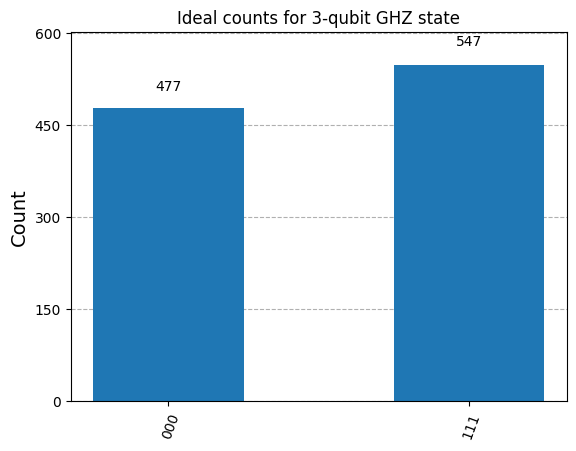

In [13]:
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

sim_ideal = AerSimulator()

# Execute and get counts
result = sim_ideal.run(transpile(circ, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import (NoiseModel, pauli_error, depolarizing_error)


In [2]:
def alice_circuit():
    # Create a quantum circuit with 1 qubit
    circ = QuantumCircuit(1, 1)
    
    # Randomly select a bit and basis
    bit = np.random.randint(2)  # 0 or 1
    basis = np.random.randint(2)  # 0 (standard) or 1 (diagonal)
    
    # Prepare qubit in either |0>, |1>, |+>, or |-> based on the basis
    if basis == 0:  # Standard basis
        if bit == 1:
            circ.x(0)  # Apply X gate to flip to |1>
    else:  # Diagonal basis
        if bit == 0:
            circ.h(0)  # Apply H gate to flip to |+>
        else:
            circ.h(0)
            circ.x(0)  # Apply X and H to flip to |->
    
    # Alice sends the qubit to Bob
    circ.measure(0, 0)
    return circ, bit, basis


In [39]:
def bob_circuit(basis, noisy_circuit):
    # Create a quantum circuit for Bob to measure in the selected basis
    bob_circ = QuantumCircuit(1, 1)
    
    # If Bob chooses diagonal basis, apply Hadamard to rotate to standard basis
    if basis == 1:
        bob_circ.h(0)
    
    # Add Alice's noisy circuit to Bob's circuit
    bob_circ.append(noisy_circuit.to_instruction(),[0])
    # Measure qubit
    bob_circ.measure(0, 0)
    return bob_circ


In [18]:
# Define the noise model
p_reset = 0.03  # Probability of qubit reset error
p_meas = 0.1  # Probability of measurement error
p_gate = 0.05  # Probability of gate error

# Define quantum errors
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
error_gate = pauli_error([('X', p_gate), ('I', 1 - p_gate)])

# Build the noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_reset, "reset")
noise_model.add_all_qubit_quantum_error(error_meas, "measure")
noise_model.add_all_qubit_quantum_error(error_gate, ["u1", "u2", "u3"])


In [40]:
# Simulate Alice's preparation of the qubit
alice_circ, alice_bit, alice_basis = alice_circuit()
# Simulate Bob’s measurement, adding noise to the circuit
bob_circ = bob_circuit(alice_basis, alice_circ)

# Setup simulator with noise model

simulator = AerSimulator(noise_model=noise_model)

# Run the simulation
result = simulator.run(bob_circ).result()

# Get the measurement results
counts = result.get_counts()

# Display the results
plot_histogram(counts)


CircuitError: 'The amount of clbit arguments 0 does not match the instruction expectation (1).'

      ┌───┐┌─┐
 q_0: ┤ H ├┤M├
      └───┘└╥┘
 q_1: ──────╫─
            ║ 
 q_2: ──────╫─
            ║ 
 q_3: ──────╫─
            ║ 
 q_4: ──────╫─
            ║ 
 q_5: ──────╫─
            ║ 
 q_6: ──────╫─
            ║ 
 q_7: ──────╫─
            ║ 
 q_8: ──────╫─
            ║ 
 q_9: ──────╫─
            ║ 
q_10: ──────╫─
            ║ 
q_11: ──────╫─
            ║ 
q_12: ──────╫─
            ║ 
q_13: ──────╫─
            ║ 
q_14: ──────╫─
            ║ 
q_15: ──────╫─
            ║ 
q_16: ──────╫─
            ║ 
q_17: ──────╫─
            ║ 
q_18: ──────╫─
            ║ 
q_19: ──────╫─
            ║ 
q_20: ──────╫─
            ║ 
q_21: ──────╫─
            ║ 
q_22: ──────╫─
            ║ 
q_23: ──────╫─
            ║ 
q_24: ──────╫─
            ║ 
q_25: ──────╫─
            ║ 
q_26: ──────╫─
            ║ 
q_27: ──────╫─
            ║ 
q_28: ──────╫─
            ║ 
q_29: ──────╫─
            ║ 
q_30: ──────╫─
            ║ 
q_31: ──────╫─
            ║ 
q_32: ──────╫─
          

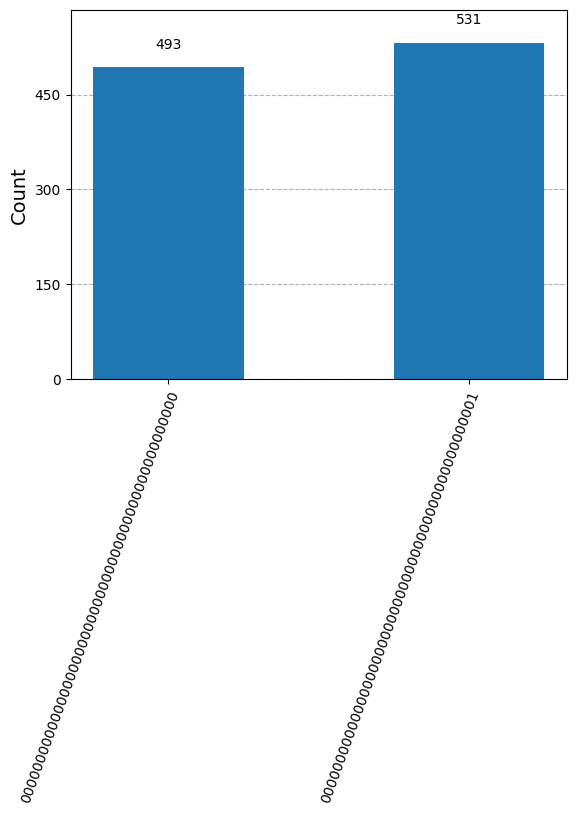

In [45]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, pauli_error

# Function for Alice to create a quantum state and prepare the qubit
def alice_circuit():
    # Create a quantum circuit with 1 qubit and 1 classical bit
    n_bits = 10

    # Randomly select a bit (0 or 1) and basis (0 = standard, 1 = diagonal)
    alice_bits = np.random.randint(2, size=n_bits)      # Alice's random bits
    alice_bases = np.random.randint(2, size=n_bits) # 0 (standard) or 1 (diagonal)
    
    # Prepare the qubit in one of the states based on the random choice
    for bit, basis in zip(alice_bits, alice_bases):
        encoded_bits=[]
        cirx = QuantumCircuit(1, 1)
    # Flip the qubit if bit is 1
        if basis == 0:  # Standard basis
                if bit == 1:
                    circ.x(0)  # Apply X gate to flip to |1>
        else:  # Diagonal basis
                if bit == 0:
                    circ.h(0)  # Apply H gate to flip to |+>
                else:
                    circ.h(0)
                    circ.x(0)  # Apply X and H to flip to |->
        encoded_bits.append(cirx)
            
        # Alice sends the qubit to Bob (measure it into the classical bit)
    circ.measure(0, 0)  # Measure the qubit into the classical bit
    print(circ)
    return circ, bit, basis

# Function for Bob to receive the qubit and measure it in the chosen basis
def bob_circuit(basis, alice_circ):
    # Create a quantum circuit for Bob to measure in the selected basis
    bob_circ = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
    
    # If Bob chooses diagonal basis, apply Hadamard to rotate to standard basis
    if basis == 1:
        bob_circ.h(0)
    
    # Append Alice's prepared qubit operation to Bob's circuit
    bob_circ.append(alice_circ.to_instruction(), [0])  # Convert Alice's circuit to instruction
    
    # Measure the qubit
    bob_circ.measure(0, 0)
    return bob_circ

# Define the noise model
def create_noise_model():
    p_reset = 0.03  # Probability of qubit reset error
    p_meas = 0.1  # Probability of measurement error
    p_gate = 0.05  # Probability of gate error
    
    # Define quantum errors
    error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
    error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
    error_gate = pauli_error([('X', p_gate), ('I', 1 - p_gate)])
    
    # Build the noise model
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_reset, "reset")
    noise_model.add_all_qubit_quantum_error(error_meas, "measure")
    noise_model.add_all_qubit_quantum_error(error_gate, ["u1", "u2", "u3"])
    
    return noise_model

# Simulate Alice's preparation of the qubit
alice_circ, alice_bit, alice_basis = alice_circuit()
print(alice_circ)
print(alice_basis)
# Simulate Bob’s measurement, adding noise to the circuit
bob_circ = alice_circ

# Setup simulator with noise model
simulator = AerSimulator(noise_model=create_noise_model())

# Run the simulation
result = simulator.run(bob_circ).result()

# Get the measurement results
counts = result.get_counts()

# Display the results
plot_histogram(counts)


In [21]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, pauli_error

# Function for Alice to create a quantum state and prepare the qubit
def alice_circuit():
    # Create a quantum circuit with 1 qubit and 1 classical bit
    circ = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
    
    # Randomly select a bit (0 or 1) and basis (0 = standard, 1 = diagonal)
    bit = np.random.randint(2)  # 0 or 1
    basis = np.random.randint(2)  # 0 (standard) or 1 (diagonal)
    
    # Prepare the qubit in one of the states based on the random choice
    if basis == 0:  # Standard basis
        if bit == 1:
            circ.x(0)  # Apply X gate to flip to |1>
    else:  # Diagonal basis
        if bit == 0:
            circ.h(0)  # Apply H gate to flip to |+>
        else:
            circ.h(0)
            circ.x(0)  # Apply X and H to flip to |->
    
    # Alice sends the qubit to Bob (measure it into the classical bit)
    circ.measure(0, 0)  # Measure the qubit into the classical bit
    return circ, bit, basis

# Function for Bob to receive the qubit and measure it in the chosen basis
def bob_circuit(basis, alice_circ):
    # Create a quantum circuit for Bob to measure in the selected basis
    bob_circ = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
    
    # If Bob chooses diagonal basis, apply Hadamard to rotate to standard basis
    if basis == 1:
        bob_circ.h(0)
    
    # Append Alice's prepared qubit operation to Bob's circuit
    bob_circ.append(alice_circ.to_instruction(), [0])  # Convert Alice's circuit to instruction
    
    # Measure the qubit
    bob_circ.measure(0, 0)
    return bob_circ

# Define the noise model
def create_noise_model():
    p_reset = 0.03  # Probability of qubit reset error
    p_meas = 0.1  # Probability of measurement error
    p_gate = 0.05  # Probability of gate error
    
    # Define quantum errors
    error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
    error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
    error_gate = pauli_error([('X', p_gate), ('I', 1 - p_gate)])
    
    # Build the noise model
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_reset, "reset")
    noise_model.add_all_qubit_quantum_error(error_meas, "measure")
    noise_model.add_all_qubit_quantum_error(error_gate, ["u1", "u2", "u3"])
    
    return noise_model

# Simulate Alice's preparation of the qubit
alice_circ, alice_bit, alice_basis = alice_circuit()

# Simulate Bob’s measurement, adding noise to the circuit
print(alice_circ)
bob_circ = bob_circuit(alice_basis, alice_circ)

# Setup simulator with noise model
simulator = AerSimulator(noise_model=create_noise_model())

# Run the simulation
result = simulator.run(bob_circ).result()

# Get the measurement results
counts = result.get_counts()

# Display the results
plot_histogram(counts)


     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


CircuitError: 'The amount of clbit arguments 0 does not match the instruction expectation (1).'

In [41]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram

# Create a simple quantum circuit for Alice to prepare a qubit
alice_circ = QuantumCircuit(1, 1)
alice_circ.h(0)  # Hadamard gate to create superposition
alice_circ.barrier()  # Optional barrier for visualization

# Create a depolarizing noise channel with probability p (probability of depolarization)
noise_prob = 0.1  # Adjust the probability for noise
depolarizing_channel = depolarizing_error(noise_prob, 1)  # 1 qubit depolarizing error

# Create a quantum circuit for Bob to receive the qubit and apply the noise channel
bob_circ = QuantumCircuit(1, 1)
bob_circ.append(alice_circ.to_instruction(), [0])  # Alice's prepared qubit
bob_circ.barrier()  # Optional barrier for visualization

# Apply the depolarizing noise channel to the qubit
bob_circ.append(depolarizing_channel, [0])  # Applying noise to qubit 0

# Measure the qubit into a classical bit
bob_circ.measure(0, 0)

# Simulate the circuit with noise
simulator = AerSimulator()
bob_circ_transpiled = transpile(bob_circ, simulator)
qobj = assemble(bob_circ_transpiled)

# Run the simulation
result = simulator.run(qobj).result()

# Get and plot the result
counts = result.get_counts()
plot_histogram(counts)


ImportError: cannot import name 'Aer' from 'qiskit' (c:\Users\91911\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\__init__.py)